<a href="https://colab.research.google.com/github/falsefoobar/CS381/blob/main/R_Leung_Quiz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quiz 3 Assignment

#Introduction

What is wine?
Wine is an alcoholic drink made by fermenting the juice of fruits, most commonly grapes. The process begins with harvesting the fruit, followed by crushing it to release the juice. Yeast is then added to ferment the natural sugars into alcohol. Grapes have been domesticated for thousands of years, giving grapes from different regions around the world different characteristics. Characteristics such as grape sweetness, skin thickness, texture, and flavor all influence the final product of the wine. In addition, elements like soil composition, local climate, and the specific yeast used also play key roles in shaping the character and quality of the wine.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://github.com/falsefoobar/CS381/blob/main/Day2_Data.csv?raw=True")

df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [3]:
df.shape

(12795, 16)

Our data set contains 12790 wines that have been tested in a lab to give us data on the chemistry of the wines.

In [4]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
ResidualSugar,616
Chlorides,638
FreeSulfurDioxide,647
TotalSulfurDioxide,682
pH,395
Sulphates,1210
Alcohol,653
STARS,3359


#What attributes does our data have?


This data set contains 16 attributes and 12795 records of data.

INDEX: unique ID

TARGET: indicates # of cases of wine sold

FixedAcidity: FixedAcidity of the wine

VolatileAcidity: Volatile acid content of the wine

CitricAcid: Citric Acid content of the wine

ResidualSugar: Residual sugar content of the wine

Chlorides: Chloride content of the wine

FreeSulfurDioxide: Sulfur Dioxide content of the wine

TotalSulfurDioxide: Total sulfur dioxide content of the wine

Density: Density of the wine

pH: pH of the wine

Sulfate: Sulfate content of the wine

Alcohol: Alcohol Content

LabelAppeal: l Subjective marketing score that indicates the appeal of the design of the label on the bottle

AcidIndex: total acidity of wine via a weighted average

STARS: Wine rating as determined by experts (4 = excellent; 1 =
Poor)


pH is the strength of acidity.

Volatile acids in wine refer to the unpleasant taste in wine. They may be caused by poor winemaking practices or storage conditions that lead to wine spoilage.

Citric acid is not commonly found in wine grapes. It is sometimes added to the wine in the wine as a supplement during the wine making process. The benefits of adding citric acid is to add acidity and prevent iron browning of the wine. THe addition of citric acid may cause some unintended changes to the favor or the wine.

During the fermentation process, the yeast would eat the sugars from the juice. Residual sugar is the leftover sugar after the fermentation process. The amount sugar left over determines the sweetness or dryness of the wine.  

Chlorides in wine refers to the saltiness flavor of the wine.

Free sulfur dioxide is the amount of available sulfur dioxide in wine to help protect against oxidation and microbial spoilage. Overtime sulfur dioxide is used up to protect the wine. The amount of free sulfur dioxide has to be constantly monitored because too much may lead to detracting from the taste of the wine, and too few may cause the wine to spoil or oxide.

Sulphates is an additive for wine to prevents spoilage by inhibiting bad microbes and acts as an antioxidant.

---


*Acids in wine*. Wikipedia, from https://en.wikipedia.org/wiki/Acids_in_wine

*Understanding Free Sulfur Dioxide (FSO₂) in Wine*, from https://extension.okstate.edu/fact-sheets/understanding-free-sulfur-dioxide-fso2-in-wine.html

#Missing Data

In [5]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
ResidualSugar,616
Chlorides,638
FreeSulfurDioxide,647
TotalSulfurDioxide,682
pH,395
Sulphates,1210
Alcohol,653
STARS,3359


Dropping uniqueID colomn because we do not need it.

In [ ]:
df = df.drop(df.columns[0], axis='columns')

In [6]:
df.shape

(12795, 16)

Given the this dataset, I found that a lot of the attributes may have a correlation with each other. The chemistry of the wine have some guidelines within the wine making process in order to maintain its intengrity.
However, we do not know what types of wine are in our data some so we cannot fill base off of the types. We can use the dryness/ sweetness of the wine to help give us input on the missing data points. For example, a wine with low residual sugar might be might have similar data points within each other.
KNN imputer would take too long to run, so I've decided to use iteravtive imputer to fill the data.

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize Iterative Imputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Apply Iterative Imputation to the dataset
df_imputed = imputer.fit_transform(df)

df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

print(df_imputed.isnull().sum())

INDEX                 0
TARGET                0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STARS                 0
dtype: int64


Data has been filled.

In [8]:
df_imputed.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1.0,3.0,3.2,1.160,-0.98,54.2,-0.567000,29.701149,268.0,0.99280,3.33,-0.59,9.900000,0.0,8.0,2.0
1,2.0,3.0,4.5,0.160,-0.81,26.1,-0.425000,15.000000,-327.0,1.02792,3.38,0.70,10.847204,-1.0,7.0,3.0
2,4.0,5.0,7.1,2.640,-0.88,14.8,0.037000,214.000000,142.0,0.99518,3.12,0.48,22.000000,-1.0,8.0,3.0
3,5.0,3.0,5.7,0.385,0.04,18.8,-0.425000,22.000000,115.0,0.99640,2.24,1.83,6.200000,-1.0,6.0,1.0
4,6.0,4.0,8.0,0.330,-1.26,9.4,0.056683,-167.000000,108.0,0.99457,3.12,1.77,13.700000,0.0,9.0,2.0


# Negative Numbers in dataset

I believe the data points that have negative numbers are a typo. So I'm going to conver the negative numbers using the absolute value of itself.

In [9]:
df[df < 0].sum()

,0
INDEX,0.000
TARGET,0.000
FixedAcidity,-6317.750
VolatileAcidity,-2027.890
CitricAcid,-2417.630
ResidualSugar,-109300.900
Chlorides,-1019.584
FreeSulfurDioxide,-460612.500
TotalSulfurDioxide,-506353.000
Density,0.000


In [11]:
cols_to_fix = ['Alcohol', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
               'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide',
               'TotalSulfurDioxide', 'Sulphates', 'AcidIndex', 'LabelAppeal']

df_imputed[cols_to_fix] = df_imputed[cols_to_fix].abs()

In [ ]:
df_imputed.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.0,3.2,1.160,0.98,54.2,0.567000,31.653432,268.0,0.99280,3.33,0.59,9.900000,0.0,8.0,2.0
1,3.0,4.5,0.160,0.81,26.1,0.425000,15.000000,327.0,1.02792,3.38,0.70,10.817177,1.0,7.0,3.0
2,5.0,7.1,2.640,0.88,14.8,0.037000,214.000000,142.0,0.99518,3.12,0.48,22.000000,1.0,8.0,3.0
3,3.0,5.7,0.385,0.04,18.8,0.425000,22.000000,115.0,0.99640,2.24,1.83,6.200000,1.0,6.0,1.0
4,4.0,8.0,0.330,1.26,9.4,0.058328,167.000000,108.0,0.99457,3.12,1.77,13.700000,0.0,9.0,2.0


#Count of cases of wine sold

I'm trying to get a sense of how many of these wines will actually make it to market.



<Axes: xlabel='TARGET', ylabel='Count'>

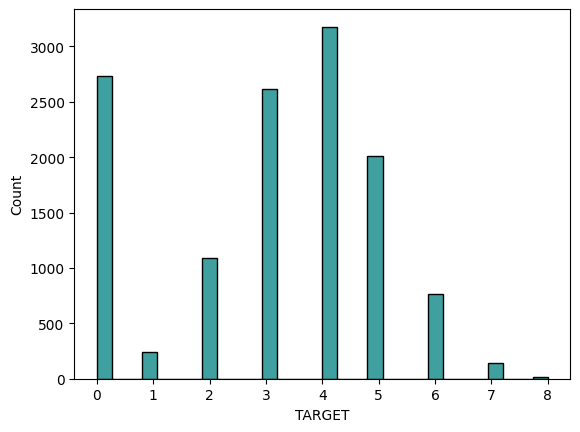

In [ ]:
sns.histplot(df['TARGET'], bins=30,color='teal')


In [16]:
df_imputed['TARGET'].value_counts()


,count
TARGET,
4.0,3177
0.0,2734
3.0,2611
5.0,2014
2.0,1091
6.0,765
1.0,244
7.0,142
8.0,17


The most of wines are sold at the 4.0 target. Followed by 0.0 target. This means that a lot of the wines being tested are not being sold.

Wines ratings of wines not being sold

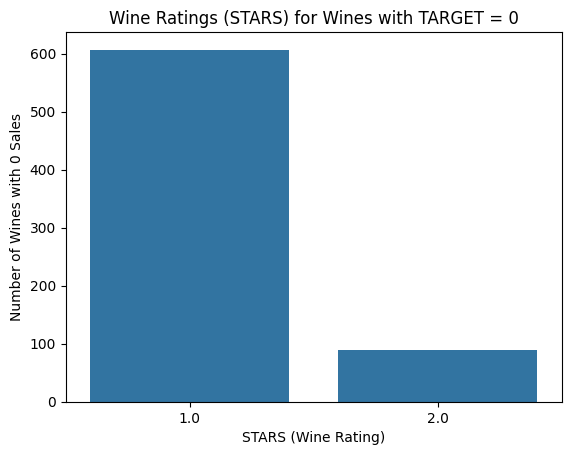

In [ ]:
no_sales_df = df[df['TARGET'] == 0]

# Count of STARS ratings in no-sales data
stars_counts = no_sales_df['STARS'].value_counts().sort_index()

# Plot
sns.barplot(x=stars_counts.index, y=stars_counts.values)
plt.title('Wine Ratings (STARS) for Wines with TARGET = 0')
plt.xlabel('STARS (Wine Rating)')
plt.ylabel('Number of Wines with 0 Sales')

plt.show()

All the wines not being sold were rated 1.0 or 2.0. 1.0 rating is an indicator of poor wine. Perhaps, wine producers would send their wines off to be tested by expert first in order to get an idea if they should bring their wine to market. Bringing a wine to market is a costly endeavor and if it's not well recieved it might be better to save those costs.

#What are the differences in chemistry between the highly rated  wines and poor rated wines?

In [ ]:
rating_1_df = df_imputed[df_imputed['STARS'] == 1]
rating_1_df.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.0
mean,2.580539,8.121384,0.659758,0.689921,22.094216,0.207930,101.564863,198.542006,0.994512,3.209590,0.797735,10.386308,0.644313,7.777778,1.0
std,1.576585,4.949353,0.562977,0.603770,24.175722,0.225671,106.005914,156.328614,0.026345,0.670865,0.617291,3.633336,0.628478,1.296262,0.0
min,0.000000,0.000000,0.000000,0.000000,0.100000,0.001000,0.000000,0.000000,0.889490,0.540000,0.000000,0.100000,0.000000,5.000000,1.0
25%,2.000000,5.700000,0.255000,0.280000,4.100000,0.046000,28.000000,101.000000,0.988382,2.980000,0.440000,9.000000,0.000000,7.000000,1.0
50%,3.000000,7.100000,0.420000,0.450000,11.500000,0.085000,52.000000,149.000000,0.994880,3.200000,0.559685,10.299858,1.000000,8.000000,1.0
75%,4.000000,10.000000,0.940000,0.980000,36.500000,0.338000,157.000000,256.000000,1.000280,3.450000,0.970000,12.000000,1.000000,8.000000,1.0
max,6.000000,31.200000,3.370000,3.770000,137.600000,1.252000,622.000000,1022.000000,1.099240,6.050000,4.110000,26.500000,2.000000,16.000000,1.0


In [ ]:
rating_4_df = df_imputed[df_imputed['STARS'] == 4]
rating_4_df.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.0
mean,5.421569,7.859641,0.603497,0.692696,22.235302,0.207751,101.911559,186.950116,0.993181,3.236199,0.777275,11.212007,0.818627,7.493464,4.0
std,0.951556,4.836771,0.538832,0.622247,23.962084,0.237174,102.045709,147.886582,0.026280,0.679089,0.600257,3.473031,0.643318,1.077195,0.0
min,4.000000,0.100000,0.010000,0.000000,0.100000,0.001000,1.000000,0.000000,0.888090,0.690000,0.010000,0.100000,0.000000,4.000000,4.0
25%,5.000000,5.600000,0.240000,0.290000,4.500000,0.039000,30.956323,98.750000,0.986613,2.960000,0.430000,9.475000,0.000000,7.000000,4.0
50%,5.000000,6.800000,0.370000,0.430000,11.225000,0.065000,51.000000,137.269935,0.992840,3.211218,0.550423,11.000000,1.000000,7.000000,4.0
75%,6.000000,8.925000,0.860000,0.942500,36.900000,0.334750,156.500000,221.250000,1.000255,3.460000,0.910000,12.900000,1.000000,8.000000,4.0
max,8.000000,30.100000,3.090000,3.680000,122.000000,1.232000,531.000000,985.000000,1.079970,5.800000,4.210000,25.600000,2.000000,13.000000,4.0


In [ ]:
rating_3_df = df_imputed[df_imputed['STARS'] == 3]
rating_3_df.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.0
mean,4.544756,7.882459,0.621413,0.692125,22.764576,0.209878,102.025759,205.226477,0.993264,3.191728,0.805191,10.864320,0.621157,7.518987,3.0
std,1.030641,4.880145,0.551060,0.611493,25.104116,0.228062,101.925393,159.351890,0.026355,0.667159,0.622220,3.486532,0.626033,1.079014,0.0
min,2.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,1.000000,0.892420,0.580000,0.000000,0.100000,0.000000,5.000000,3.0
25%,4.000000,5.600000,0.240000,0.290000,4.457111,0.042000,30.000000,109.000000,0.986670,2.977500,0.440000,9.300000,0.000000,7.000000,3.0
50%,5.000000,6.900000,0.370000,0.420000,12.000000,0.079000,52.000000,150.000000,0.993205,3.190000,0.550000,10.800000,1.000000,7.000000,3.0
75%,5.000000,9.225000,0.891250,0.980000,36.625000,0.348250,162.125000,252.000000,0.999742,3.430000,1.010000,12.600000,1.000000,8.000000,3.0
max,8.000000,31.800000,3.550000,3.630000,141.150000,1.214000,567.000000,1048.000000,1.096580,5.810000,3.920000,25.100000,2.000000,17.000000,3.0


Based on my observations, the most significant indicators of a wine's rating STARS appear to be volatile acidity, followed by label appeal. Volatile acidity refers to the presence of undesirable flavors in the wine. The average volatile acidity for a 4-star wine is 0.60, for a 3-star wine is 0.62, and for a 0-star wine is 0.65. As volatile acidity increases, the wine's rating tends to decrease.

Additionally, another possible indicator could be the fixed acidity. Fixed acidity refers to the non volatile acids present in wine. Based on the data , higher-rated wines had an average fixed acidity of 7.8, while lower-rated wines had an average of 8.0. This might suggest that the "sweet spot" for good wines might be around 7.8. But why might lower-quality wines have a higher fixed acidity? One reason could be that winemakers may add more acids after fermentation, often due to poor practices or unfavorable conditions, in an attempt to stabilize the wine. However, this added acidity could result in a less pleasant taste.

##Is there a correlation between fixed acidity and volatile acidity?

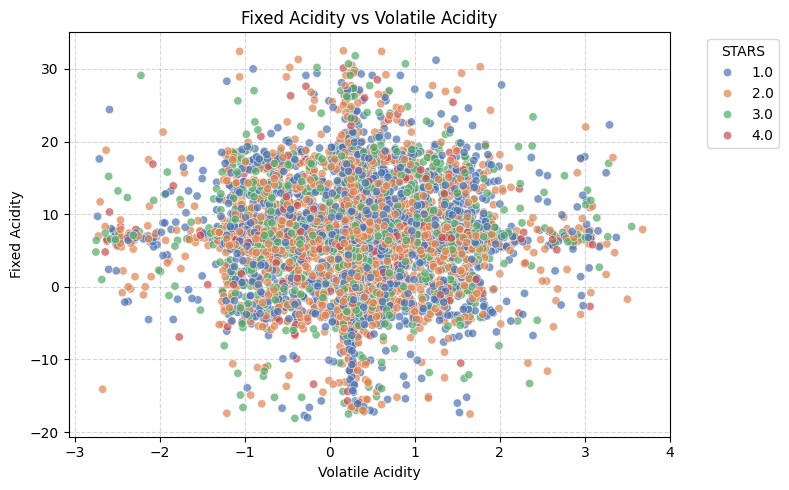

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='VolatileAcidity',
    y='FixedAcidity',
    hue='STARS',
    palette='deep',
    alpha=0.7  # Only one alpha
)
plt.title('Fixed Acidity vs Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('Fixed Acidity')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='STARS', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

There is little to no correlation.

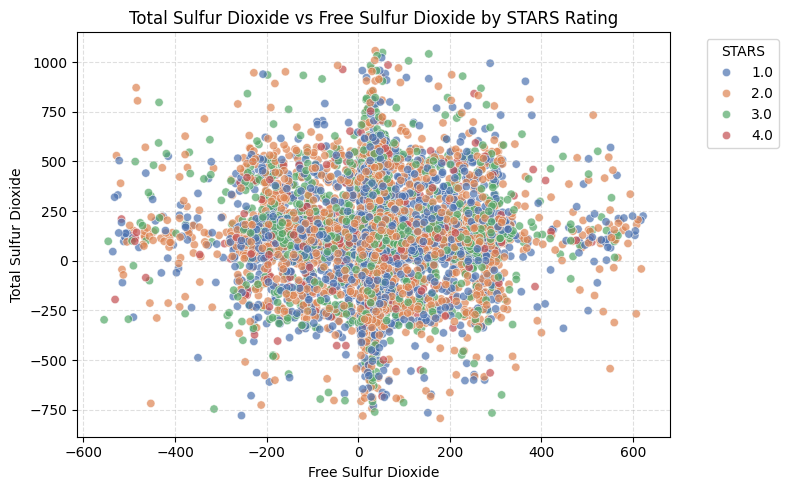

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='FreeSulfurDioxide',
    y='TotalSulfurDioxide',
    hue='STARS',
    palette='deep'	,
    alpha=0.7
)
plt.title('Total Sulfur Dioxide vs Free Sulfur Dioxide by STARS Rating')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.legend(title='STARS', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

No correlation from the sulfur dioxide measurement.

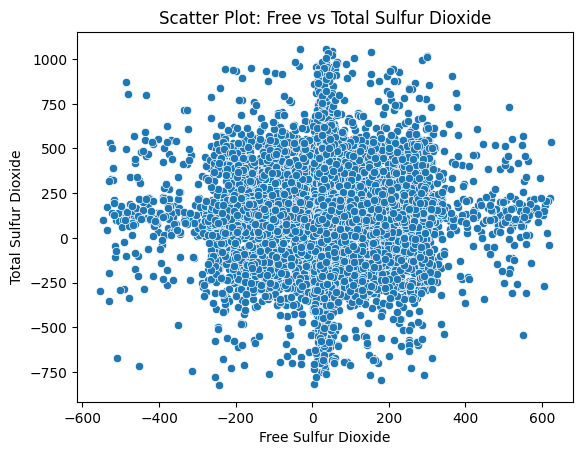

In [ ]:
sns.scatterplot(data=df, x='FreeSulfurDioxide', y='TotalSulfurDioxide')
plt.title("Scatter Plot: Free vs Total S
ulfur Dioxide")
plt.xlabel("Free Sulfur Dioxide")
plt.ylabel("Total Sulfur Dioxide")
plt.show()

No correlation in free sulfur dioxide and total sulfur dioxide.

#Conclusion

There may be a correlation between the subjective STARS rating and the chemical properties of the wine, but based on the available data, there isn't enough evidence to confirm this relationship.

I believe the problem with this data set is that the that there are so many different types of grapes and many different types of wine. The type of grapes used, heavily influences the chemistry of wines. If there is an attribute that could give us the type of grape, maybe we can find correlations in chemistry of the wines produce by certain grapes.

The two biggest categories of wines are red wines and white wines. Red wines are wines that keeps the skin of the grape during the wine making process. This has a tremendous outcome in the wine produced. Grape skins gives the wine a deep color and different flavor. Grape skins contain tannins, which is what gives red wines a dry mouth feel during consumption. On the other hand, in white wines the grape skins are removed. The removal of the skins give the wine a lighter color and a different flavor profile. The lack of tanins means that the acidity of the wine is more prelevant.

The lack of an attribute indicating the wine category makes it difficult to create observations from this dataset. The data feels quite random and challenging to interpret when all the different types are grouped together without separation.


*The Different Types of Wine Grapes*, from https://www.firstleaf.com/wine-school/article/the-different-types-of-wine-grapes

#References

https://en.wikipedia.org/wiki/Wine

https://en.wikipedia.org/wiki/Wine_chemistry

https://extension.okstate.edu/fact-sheets/understanding-free-sulfur-dioxide-fso2-in-wine.html

https://www.firstleaf.com/wine-school/article/the-different-types-of-wine-grapes

https://waterhouse.ucdavis.edu/whats-in-wine
